## A basic regression ML Model that predicts price based on specs
---

- Install Dependencies

In [33]:
#!pip install pandas scikit-learn matplotlib

 - Import Dependencies

In [35]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


- Load Cleansed Data

In [15]:
df = pd.read_csv("cleaned_mobile_data.csv")  
df.head()

,brand,model,color,memory,storage,rating,selling_price,original_price,discount_amount,discount_percent,price_segment
0,Oppo,A53,Moonlight Black,4096.0,65536.0,4.5,11990,15990,4000,25.02,Budget
1,Oppo,A53,Mint Cream,4096.0,65536.0,4.5,11990,15990,4000,25.02,Budget
2,Oppo,A53,Moonlight Black,6144.0,131072.0,4.3,13990,17990,4000,22.23,Mid-Range
3,Oppo,A53,Mint Cream,6144.0,131072.0,4.3,13990,17990,4000,22.23,Mid-Range
4,Oppo,A53,Electric Black,4096.0,65536.0,4.5,11990,15990,4000,25.02,Budget


- Encode Categorical Columns to Numerical

In [19]:
label_cols = ['model', 'color']
for col in label_cols:
    df[col] = LabelEncoder().fit_transform(df[col])

- Split into Feature & Target

In [23]:
X = df[['model', 'color', 'memory', 'storage', 'rating']]
y = df['selling_price']

- Train Test Split

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

- Train a RandomForestRegressor Model

In [27]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


- Evaluate performance over test

In [28]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Squared Error: 86730247.63
R² Score: 0.90


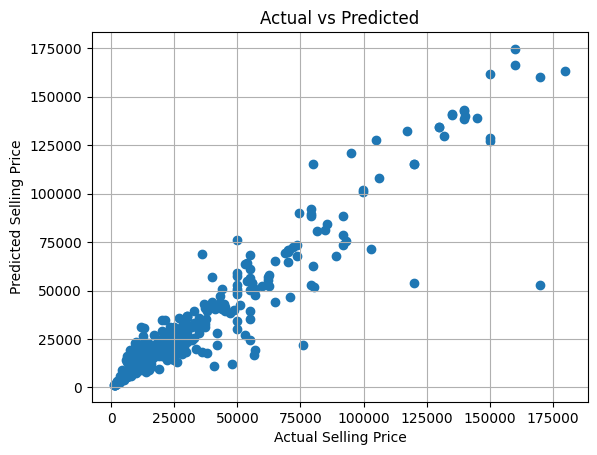

In [36]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Selling Price")
plt.ylabel("Predicted Selling Price")
plt.title("Actual vs Predicted")
plt.grid(True)
plt.show()